# Stock Statistics with Python

The dataset can be found [here](https://www.kaggle.com/rohanrao/nifty50-stock-market-data)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BA = pd.read_csv("http://datasets.rishit.tech/BAJAJ-AUTO.csv")

In [4]:
BA.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.00,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.00,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.90,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.40,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.00,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420
5,2008-06-02,BAJAJ-AUTO,EQ,571.70,605.50,615.00,570.70,573.00,580.80,598.30,206640,1.236326e+13,NaN,69415,0.3359
6,2008-06-03,BAJAJ-AUTO,EQ,580.80,596.00,602.00,555.15,577.00,579.70,575.83,157283,9.056802e+12,NaN,106984,0.6802
7,2008-06-04,BAJAJ-AUTO,EQ,579.70,597.85,597.85,547.50,550.00,552.10,563.64,326450,1.839993e+13,NaN,238952,0.7320
8,2008-06-05,BAJAJ-AUTO,EQ,552.10,553.00,588.80,532.40,548.00,562.40,560.70,238915,1.339603e+13,NaN,140638,0.5887
9,2008-06-06,BAJAJ-AUTO,EQ,562.40,567.00,574.70,544.40,572.00,568.80,564.38,73920,4.171903e+12,NaN,35676,0.4826


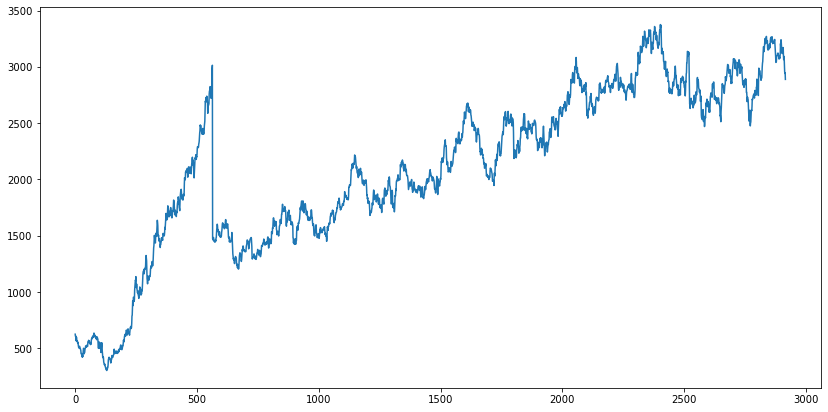

In [5]:
BA.VWAP.plot(figsize=(14, 7))

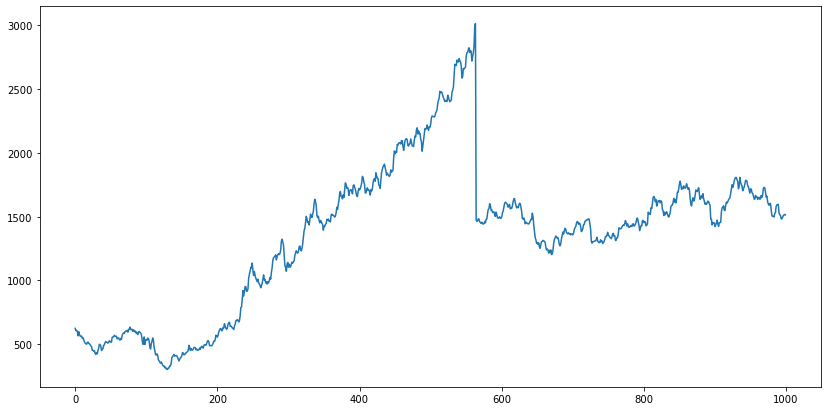

In [14]:
BA.VWAP[:1000].plot(figsize=(14, 7))

## Variance

$$var(x) = \frac{\sum{(x - \bar x)^2}}{n}$$

### Mean

In [6]:
def mean(data):
    mean, elements = 0, 0
    for value in data:
        elements += 1
    mean = data.sum()
    mean /= elements
    return mean

### Variance

In [7]:
def variance(data):
    v, elements = 0, 0
    mean_data = mean(data)
    for value in data:
        elements += 1
        z = ((value - mean_data)**2)
        v += z
    v /= elements
    return v

In [8]:
mean(BA.VWAP)

2099.629831961591

In [9]:
variance(BA.VWAP)

541792.8092114602

## Standard deviation

$$\sigma_x = \sqrt{\frac{\sum{(x - \bar x)^2}}{n}} = \sqrt{var(x)}$$

In [10]:
sd_ba = variance(BA.VWAP) ** 0.5
sd_ba

736.0657641892199

## Covariance

$$cov(x, y) = \frac{\sum{(x - \bar x) \cdot (y - \bar y)}}{n}$$

In [18]:
def covariance(data1, data2):
    cov, elements = 0, 0
    mean_data1 = mean(data1)
    mean_data2 = mean(data2)
    for value in data1:
        elements += 1
    for index in range(elements):
        cov += ((data1[index] - mean_data1) * ((data2[index] - mean_data2)))
    cov /= elements
    return cov

In [11]:
BA.Date = pd.to_datetime(BA.Date)
index = 0
days = []
for date in BA.Date:
    days.append((BA.Date[index] - BA.Date[0]).days)
    index += 1

In [12]:
BA.insert(1, "Days", days)

In [13]:
BA.head()

,Date,Days,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,0,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,1,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,2,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,3,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,4,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [19]:
covariance(BA.VWAP, BA.Days)

819213.0482495737

## Correlation (r)

$$r = \frac{cov(x, y)}{\sigma_x \cdot \sigma_y}$$

In [23]:
def correl(data1, data2):
    r = covariance(data1, data2)
    r /= ((variance(data1) * variance(data2)) ** 0.5)
    return r

In [24]:
correl(BA.VWAP, BA.Days)

0.898286487435951